# Recipe Recommendation System: Data Preparation

Author: Kelly Li


## Table of contents:
* [1 Introduction](#one)
* [2 Datasets](#two)
    * [2.1 Data Sources](#twoone)
    * [2.2 Data Import & Summary](#twotwo)
* [3 Data Cleaning](#three)
    * [3.1 Data Types](#threeone) 
    * [3.2 Missing Data](#threetwo)
    * [3.3 Duplicate Data](#threethree)
    * [3.4 Outliers](#threefour)
    * [3.5 Zero Ratings](#threefive)
* [4 Data Preprocessing](#four)
    * [4.1 Column Splitting](#fourone)
    * [4.2 One-Hot Encoding](#fourtwo) 
* [5 Conclusion](#five)

-------------------------------------------------------------------------------------------------------------------------------

## 1 Introduction <a class="anchor" id="one"></a>

Cooking enthusiasts often face challenges in finding personalized and diverse recipes that align with their tastes, dietar restrictions, and ingredient preferences. The existing search process is time-consuming, lacks inspiration, and fails to cater to specific dietary needs. To address these challenges, we have developed a recipe recommendation system that aids in recipe discovery, focusing on providing inspiration and catering to specific dietary needs. By leveraging advanced algorithms, it curates personalized recipe suggestions that ignite culinary creativity while considering unique tasts and dietary requirements. Wecome a world a culinary inspiration with

## 2 Datasets <a class="anchor" id="two"></a>

The food.com dataset, curated by Bodhisattwa Prasad Majumder, Shuyang Li, Jianmo Ni, and Julian McAuley, provides a wealth of information for our exploration study. With over 180,000 recipes and 700,000 recipe reviews, this dataset captures 18 years of user interactions and uploads on Food.com.

### 2.1 Data Sources <a class="anchor" id="twoone"></a>

Here's the data dictionary for the columns in the raw recipe dataset:

| Column Name   | Description                                               |
| ------------- | --------------------------------------------------------- |
| name          | The name of the recipe.                                   |
| id            | The unique identifier of the recipe.                       |
| minutes       | The total cooking and preparation time in minutes.         |
| contributor_id| The unique identifier of the user who submitted the recipe|
| submitted     | The date when the recipe was submitted.                    |
| tags          | Tags or labels associated with the recipe (e.g., vegetarian, vegan, dessert). |
| nutrition     | Nutritional information (i.e. calories (#), total fat (PDV*), sugar (PDV*) , sodium (PDV*) , protein (PDV*) , saturated fat). |
| n_steps       | The total number of steps or instructions in the recipe.   |
| steps         | The step-by-step instructions for preparing the recipe.    |
| description   | A brief description or summary of the recipe.              |
| ingredients   | The list of ingredients required for the recipe.           |
| n_ingredients | The total number of ingredients used in the recipe.        |

*PDV = % daily value

Here's the data dictionary for the columns in the raw user interactions dataset:

| Column Name | Description                                          |
| ----------- | ---------------------------------------------------- |
| user_id     | The unique identifier of the user.                    |
| recipe_id   | The unique identifier of the recipe associated with the user's interaction. |
| date        | The date when the user's interaction took place.      |
| rating      | The rating given by the user for the recipe.          |
| review      | The review or feedback provided by the user for the recipe. |

### 2.2 Data Import & Summary <a class="anchor" id="twotwo"></a>

In [82]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [83]:
# Read the raw datasets
raw_recipes_df = pd.read_csv('RAW_recipes.csv')
raw_users_df = pd.read_csv('RAW_interactions.csv')

In [84]:
# Shape of the data
print('The shape of the recipe dataset is:', raw_recipes_df.shape)
print('The shape of the user interactions dataset is:', raw_users_df.shape)

The shape of the recipe dataset is: (231637, 12)
The shape of the user interactions dataset is: (1132367, 5)


In [85]:
# View recipes dataset
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [86]:
# View user interactions dataset
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## 3 Data Cleaining <a class="anchor" id="three"></a>

### 3.1 Data Types <a class="anchor" id="threeone"></a>

To gain a comprehensive understanding of the data types and identify any non-null values within the dataset, we will employ the `.info()` method.

In [87]:
# Info about the recipe dataset
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


The 'id' and 'contributor_id' columns are currently of `integer` data type, while the 'submitted' column is of `object` data type. To ensure consistency and facilitate data manipulation, we will convert the 'id' and 'contributor_id' columns to `object` data type. Additionally, we will convert the 'submitted' column to `datetime` data type for more convenient date-based operations.

In [88]:
# Convert 'id' and 'contributor_id' columns to object data type
raw_recipes_df['id'] = raw_recipes_df['id'].astype(str)
raw_recipes_df['contributor_id'] = raw_recipes_df['contributor_id'].astype(str)

# Convert 'submitted' column to date data type
raw_recipes_df['submitted'] = pd.to_datetime(raw_recipes_df['submitted'], format='%Y-%m-%d')

# Print updated data types of the columns
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            231636 non-null  object        
 1   id              231637 non-null  object        
 2   minutes         231637 non-null  int64         
 3   contributor_id  231637 non-null  object        
 4   submitted       231637 non-null  datetime64[ns]
 5   tags            231637 non-null  object        
 6   nutrition       231637 non-null  object        
 7   n_steps         231637 non-null  int64         
 8   steps           231637 non-null  object        
 9   description     226658 non-null  object        
 10  ingredients     231637 non-null  object        
 11  n_ingredients   231637 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 21.2+ MB


Let us now examine the data types within the user interactions dataset.

In [89]:
# Info about the recipe dataset
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


Similar to the recipes dataset, the 'user_id' and 'recipe_id' columns are currently of `integer` data type, while the 'date' column is of `object` data type. To ensure consistency and facilitate data manipulation, we will convert the 'user_id' and 'recipe_id' columns to `object` data type. Additionally, we will convert the 'date' column to `datetime` data type for more convenient date-based operations.

In [90]:
# Convert 'user_id' and 'recipe_id' columns to object data type
raw_users_df['user_id'] = raw_users_df['user_id'].astype(str)
raw_users_df['recipe_id'] = raw_users_df['recipe_id'].astype(str)

# Convert 'submitted' column to date data type
raw_users_df['date'] = pd.to_datetime(raw_users_df['date'], format='%Y-%m-%d')

# Print updated data types of the columns
raw_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1132367 non-null  object        
 1   recipe_id  1132367 non-null  object        
 2   date       1132367 non-null  datetime64[ns]
 3   rating     1132367 non-null  int64         
 4   review     1132198 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 43.2+ MB


### 3.2 Missing Data <a class="anchor" id="threetwo"></a>

Now that we have gained a deeper understanding of the dataset, let us proceed to explore any potential missing values within it.

In [91]:
# Checking for missing values
raw_recipes_df.isna().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

There is 1 missing value in the 'name' column and 4,979 missing values in the 'description' column. values represent. Let us examine the specific rows that contain missing values to identify any discernible patterns and explore potential strategies for data imputation.

In [92]:
# Row with missing name
raw_recipes_df[raw_recipes_df['name'].isna()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


It appears that the row with the missing 'name' value also lacks a corresponding description. Consquently, we are unable to infer a name from the description itself, as there is not textual information available to guide the imputation process. Considering that there is only one instance with a missing 'name' value, we can safely drop this row from the dataset.

In [93]:
# Drop row with missing name
raw_recipes_df.dropna(subset=['name'], inplace=True)

In [94]:
# Sanity check
raw_recipes_df.isna().sum()

name                 0
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

Let us take a look at the rows with a missing description.

In [95]:
# Row with missing description
raw_recipes_df[raw_recipes_df['description'].isna()].sample(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
124321,lime mint freezer pickles,37068,20,1533,2002-08-13,"['30-minutes-or-less', 'time-to-make', 'course...","[365.4, 0.0, 325.0, 218.0, 4.0, 0.0, 29.0]",9,"['gently wash cucumbers and thinly slice , dis...",NaN,"['pickling cucumbers', 'pickling salt', 'onion...",9
101969,hamburger noodle corn casserole,9781,15,10951,2001-06-29,"['15-minutes-or-less', 'time-to-make', 'course...","[575.0, 38.0, 41.0, 25.0, 76.0, 57.0, 17.0]",2,['brown hamburger and onions- add corn and sou...,NaN,"['noodles', 'hamburger', 'onion', 'tomato soup...",6
884,100 whole wheat bread,6652,40,34879,2000-03-06,"['weeknight', '60-minutes-or-less', 'time-to-m...","[1445.4, 62.0, 207.0, 104.0, 85.0, 70.0, 81.0]",9,['dissolve yeast in 2 / 3 c water while your m...,NaN,"['water', 'dry active yeast', 'sugar', 'milk',...",8
148613,orange and spice pie,61341,540,57505,2003-05-06,"['weeknight', 'time-to-make', 'course', 'main-...","[637.7, 67.0, 169.0, 11.0, 18.0, 111.0, 18.0]",10,"['combine the eggs , sugar , orange zest , gin...",NaN,"['eggs', 'sugar', 'orange zest', 'ground ginge...",9
175310,roasted cauliflower with garlic,32966,40,1533,2002-07-02,"['60-minutes-or-less', 'time-to-make', 'course...","[275.8, 28.0, 43.0, 13.0, 18.0, 13.0, 8.0]",3,"['preheat oven to 425 degrees', 'toss cauliflo...",NaN,"['cauliflower', 'olive oil', 'garlic', 'salt',...",5
158805,pesto beef sandwich in the round,4053,0,1533,1999-11-06,"['15-minutes-or-less', 'time-to-make', 'course...","[690.1, 20.0, 22.0, 109.0, 78.0, 22.0, 34.0]",11,"['cut bread loaf horizontally in half', 'remov...",NaN,"['deli roast beef', 'french bread', 'light may...",9
211930,the doctor s sourdough bread,6664,270,56112,2000-03-06,"['weeknight', 'time-to-make', 'course', 'prepa...","[226.7, 3.0, 21.0, 17.0, 12.0, 5.0, 14.0]",17,['mix the starter and 2 1 / 2 cups of the flou...,NaN,"['sourdough starter', 'water', 'milk', 'butter...",11
102542,harvest turkey cranberry and brown rice salad,4915,0,22015,1999-11-25,"['15-minutes-or-less', 'time-to-make', 'course...","[481.1, 42.0, 36.0, 19.0, 18.0, 15.0, 17.0]",19,"['to prepare dressing place orange juice , vin...",NaN,"['fresh orange juice', 'rice vinegar', 'fresh ...",19
25873,blueberry buttertarts,94,40,1556,1999-09-12,"['60-minutes-or-less', 'time-to-make', 'course...","[337.9, 28.0, 46.0, 5.0, 8.0, 23.0, 13.0]",8,"['preheat oven to 375f', 'leave shells in foil...",NaN,"['frozen tart shells', 'egg', 'corn syrup', 'l...",8
225823,whiskey sour sirloin,6923,360,33443,2000-03-06,"['weeknight', 'time-to-make', 'course', 'main-...","[128.2, 14.0, 16.0, 16.0, 0.0, 5.0, 2.0]",11,['when getting the steak look for a good piece...,NaN,"['round bone sirloin', 'lemon juice', 'orange ...",9


Since the descriptions are written by the recipe contributors themselves and not available in the source, it is not feasible to impute missing values for the 'description' column. Let us look at the extent to which these missing values constitute the overall dataset.

In [96]:
print('Missing values make up', round(raw_recipes_df.isna().sum().sum()/raw_recipes_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values make up 2.15 % of the overall data.


Given that the missing values in the 'description' column constitute a small subset of the overall dataset, we can safely drop these rows.

In [97]:
# Drop rows with missing description
raw_recipes_df.dropna(subset=['description'], inplace=True)

In [98]:
# Sanity check
raw_recipes_df.isna().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

We will now take a look at the user interactions dataset to identify any missing values.

In [99]:
raw_users_df.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64

There are 169 missing values in the 'review' column. values represent. Similar to the 'description' column in the recipes dataset, as the reviews are written by users themselves and are not available in the source, it is not feasible to impute missing values for the 'review' column. Let us now assess the proportion of these missing values in relation to the overall dataset.

In [100]:
print('Missing values make up', round(raw_users_df.isna().sum().sum()/raw_users_df.shape[0]*100, 2), "%", "of the overall data.")

Missing values make up 0.01 % of the overall data.


Given that the missing values in the 'review' column constitute a very small subset of the overall dataset, we can safely drop these rows.

In [101]:
# Drop rows with missing description
raw_users_df.dropna(subset=['review'], inplace=True)

In [102]:
# Sanity check
raw_users_df.isna().sum()

user_id      0
recipe_id    0
date         0
rating       0
review       0
dtype: int64

### 3.3 Duplicate Data <a class="anchor" id="threethree"></a>

Now that we have addressed the missing values, let us proceed to identify any potential duplicates within the datasets.

In [103]:
# Duplicated rows
print("duplicated rows in recipes dataset:", raw_recipes_df.duplicated().sum())
print("duplicated rows in user interactions dataset:", raw_users_df.duplicated().sum())

duplicated rows in recipes dataset: 0
duplicated rows in user interactions dataset: 0


Great! It appears that there are no duplicated rows within the datasets.

### 3.4 Outliers <a class="anchor" id="threefour"></a>

In this section, we will examine the datasets to identify the presence of any outliers.

In [104]:
# Summary statistics of recipes dataset
raw_recipes_df.describe()

,minutes,n_steps,n_ingredients
count,2.266570e+05,226657.000000,226657.000000
mean,9.602472e+03,9.773927,9.054170
std,4.510715e+06,5.999824,3.740942
min,0.000000e+00,0.000000,1.000000
25%,2.000000e+01,6.000000,6.000000
50%,4.000000e+01,9.000000,9.000000
75%,6.500000e+01,12.000000,11.000000
max,2.147484e+09,145.000000,43.000000


The value "2,147,484,000 minutes" (max minutes) does indeed seem like an unusually long time to cook a recipe. The maximum value of "2,147,484,000 minutes" in the "minutes" column does indeed seem like an unusually long time to cook a recipe and certainly does appear to be an outlier. Similarly, the high number of steps (145) and ingredients (43) also seem to deviate from the average values. Let us examine these columns more closely to understand this further.

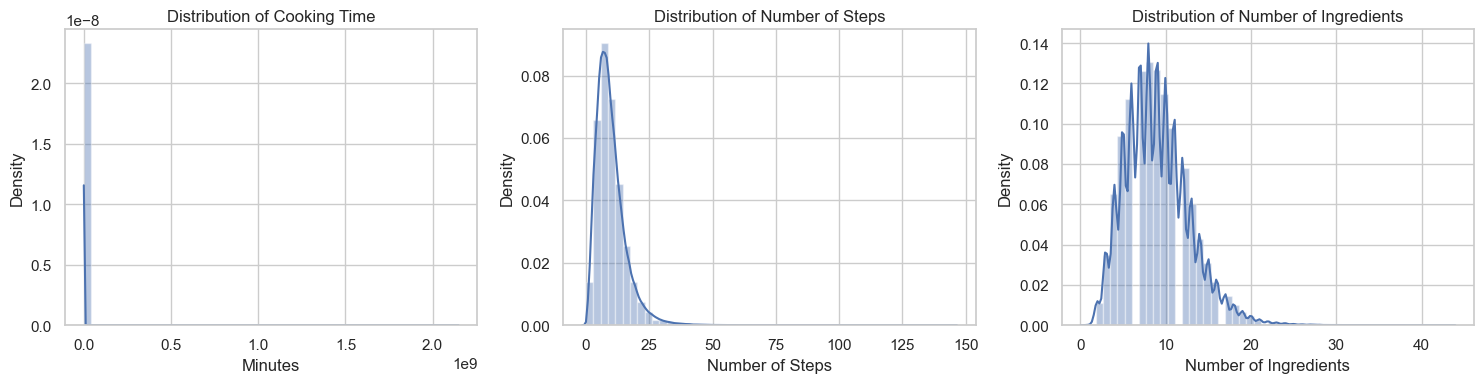

In [105]:

# Distribution
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot distribution of 'minutes' on the first subplot
sns.distplot(raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_xlabel('Minutes')
ax[0].set_ylabel('Density')
ax[0].set_title('Distribution of Cooking Time')

# Plot distribution of 'n_steps' on the second subplot
sns.distplot(raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_xlabel('Number of Steps')
ax[1].set_ylabel('Density')
ax[1].set_title('Distribution of Number of Steps')

# Plot distribution of 'n_ingredients' on the third subplot
sns.distplot(raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_xlabel('Number of Ingredients')
ax[2].set_ylabel('Density')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

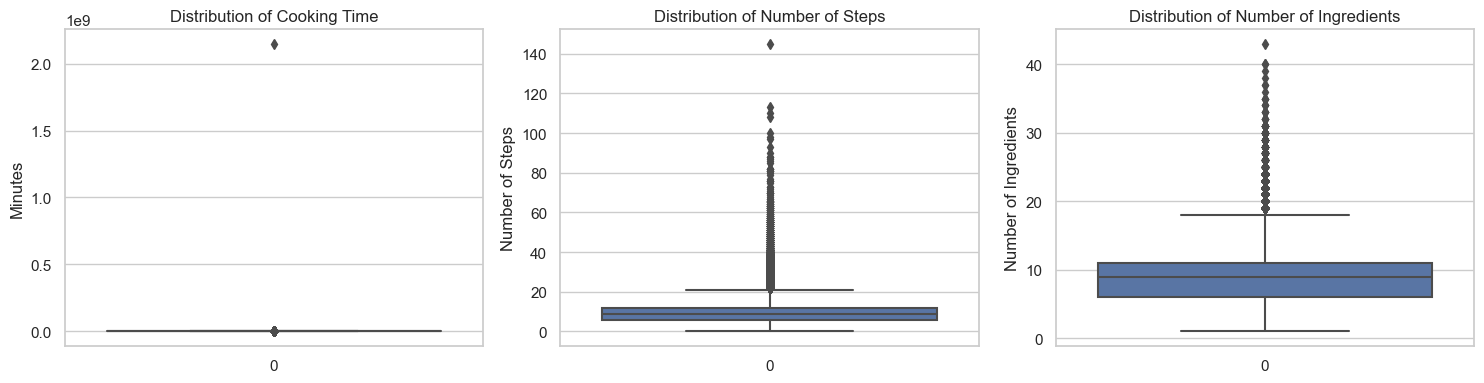

In [106]:
# Boxplots
# Create a figure with three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot boxplot of 'minutes' on the first subplot
sns.boxplot(data=raw_recipes_df["minutes"], ax=ax[0])
ax[0].set_ylabel('Minutes')
ax[0].set_title('Distribution of Cooking Time')

# Plot boxplot of 'n_steps' on the second subplot
sns.boxplot(data=raw_recipes_df["n_steps"], ax=ax[1])
ax[1].set_ylabel('Number of Steps')
ax[1].set_title('Distribution of Number of Steps')

# Plot boxplot of 'n_ingredients' on the third subplot
sns.boxplot(data=raw_recipes_df["n_ingredients"], ax=ax[2])
ax[2].set_ylabel('Number of Ingredients')
ax[2].set_title('Distribution of Number of Ingredients')

plt.tight_layout()
plt.show()

It appears that there may be outliers present in the dataset. To further investigate and identify these outliers, we will employ the Tukey method, a statistical technique commonly used to detect and analyze outliers.

In [107]:
# Cooking time
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['minutes'].quantile(0.25)
Q3 = raw_recipes_df['minutes'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
minutes_outliers = raw_recipes_df[(raw_recipes_df['minutes'] > max_value) | (raw_recipes_df['minutes'] < min_value)]
minutes_outliers.sort_values('minutes')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
206778,sweet rice pudding,454411,133,1889545,2011-04-25,"['time-to-make', 'course', 'main-ingredient', ...","[338.6, 12.0, 185.0, 3.0, 16.0, 20.0, 19.0]",23,"['place the rice in a medium-sized bowl', 'fil...",this is a traditional recipe from india and it...,"['basmati rice', 'whole milk', 'granulated sug...",7
204465,super soft bread machine rolls with wheat germ,210241,133,260718,2007-02-09,"['time-to-make', 'course', 'main-ingredient', ...","[1580.3, 93.0, 106.0, 92.0, 83.0, 171.0, 71.0]",7,"['in bread machine pan , put in the following ...",this recipe is adapted from the buttery bread ...,"['milk', 'vanilla essence', 'butter', 'sugar',...",9
94271,gooey butter cookies,34390,133,43121,2002-07-16,"['weeknight', 'time-to-make', 'course', 'prepa...","[163.3, 14.0, 49.0, 8.0, 3.0, 23.0, 5.0]",8,"['cream together cream cheese and butter', 'ad...",so easy to make and always a hit!,"['cream cheese', 'butter', 'egg', 'vanilla', '...",6
99018,grilled halibut with lemon tarragon mustard,116898,134,39547,2005-04-12,"['time-to-make', 'course', 'main-ingredient', ...","[470.1, 23.0, 2.0, 16.0, 153.0, 12.0, 1.0]",8,['in a small bowl whisk together the lemon jui...,"adapted from a recipe in ""the taste of summer""...","['fresh lemon juice', 'lemon, zest of', 'dijon...",9
183119,sea bass with citrus and soy,23101,134,8688,2002-03-21,"['weeknight', 'time-to-make', 'course', 'main-...","[275.1, 16.0, 24.0, 60.0, 69.0, 9.0, 3.0]",14,"['mix first 6 ingredients in 8x8x2"" glass baki...","simple, elegant and healthy, too! what more ca...","['pineapple juice', 'orange juice', 'soy sauce...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


As observed from the results, the application of the Tukey method for outlier detection tends to filter out a considerable number of recipes that may have longer preparation times but are still reasonable. For instance, recipes like pickles, extracts, and liqueurs often require several days or even weeks to prepare, and these longer durations should not be considered as outliers in the context of their specific culinary processes. 

The dataset includes an extreme outlier with a preparation time of 1,051,200 minutes, which corresponds to the recipe '[No Bake Granola Balls](https://www.food.com/recipe/no-bake-granola-balls-261647)'. Upon further investigation, it appears that this value may be the result of a data collection error or scraping issue. To address this, we will manually input the correct preparation time for the 'No Bake Granola Balls' recipe based on reliable sources. While this recipe might possess unique value or significance, for the purpose of this exploration, we will exclude it from further analysis. 

In [108]:
# Replace thie cooking time with 25 minutes
raw_recipes_df.loc[raw_recipes_df['id'] == '261647', 'minutes'] = 25

# Check value
raw_recipes_df[raw_recipes_df['id'] == '261647']

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,25,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


As for the second extreme outlier with a preparation time of 1,051,200 minutes, attributed to the '[How to Preserve a Husband](https://www.food.com/recipe/how-to-preserve-a-husband-447963)'recipe, while it may have its unique significance, we will exclude it from further exploration and analysis to focus on the majority of recipes in the dataset.

In [109]:
# Remove row
raw_recipes_df = raw_recipes_df[raw_recipes_df['id'] != '447963']

In [110]:
# Sanity check
raw_recipes_df.sort_values('minutes', ascending=True).tail()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5497,angelica liqueur,70551,201610,59064,2003-09-04,"['weeknight', 'time-to-make', 'course', 'cuisi...","[891.8, 0.0, 906.0, 0.0, 1.0, 0.0, 76.0]",7,"['crush the fennel , aniseed , coriander seeds...",finish off a large meal with a tiny glass of t...,"['fennel seed', 'anise seed', 'coriander seeds...",7
155044,peach brandy,98912,216015,34146,2004-09-01,"['time-to-make', 'course', 'main-ingredient', ...","[3645.3, 3.0, 2040.0, 0.0, 16.0, 0.0, 173.0]",9,"['use only fully ripened , unblemished fruit',...",posted in reply to a message board request for,"['fresh peaches', 'granulated sugar', 'honey',...",4
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3


Having addressed the outliers in cooking time, let us now shift our focus to the number of steps involved in each recipe.

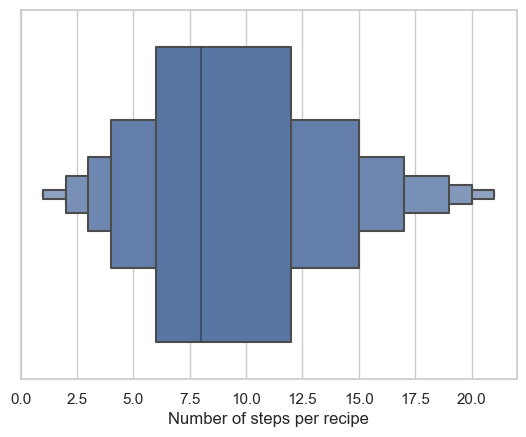

In [119]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

In [112]:
# Number of steps
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_steps'].quantile(0.25)
Q3 = raw_recipes_df['n_steps'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_steps'] > max_value) | (raw_recipes_df['n_steps'] < min_value)]
nsteps_outliers.sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
216131,traditional iraqi casserole tepsi baytinijan,288850,90,510313,2008-02-27,"['time-to-make', 'course', 'main-ingredient', ...","[375.5, 20.0, 51.0, 7.0, 44.0, 25.0, 15.0]",22,['peel the eggplant in wide stripes and remove...,in iraq tepsi baytinijan is a very famous dish...,"['eggplants', 'tomatoes', 'onion', 'garlic clo...",10
70506,deep dish pizza with sausage garlic and mozz...,224394,75,37779,2007-04-24,"['time-to-make', 'course', 'main-ingredient', ...","[929.5, 104.0, 48.0, 113.0, 107.0, 147.0, 7.0]",22,['position oven rack on the 2nd-lowest level i...,a husband favorite,"['olive oil', 'pizza dough', 'mild italian sau...",7
169411,quick tikka masala,369865,45,31807,2009-05-05,"['60-minutes-or-less', 'time-to-make', 'course...","[514.5, 41.0, 8.0, 8.0, 114.0, 54.0, 2.0]",22,['grate 1 piece of ginger into a large zip top...,"adapted from blake royer's ""dinner tonight"" co...","['fresh ginger', 'garlic clove', 'salt', 'grou...",17
33105,cabbage tart,62295,85,80353,2003-05-15,"['weeknight', 'time-to-make', 'course', 'main-...","[614.3, 65.0, 18.0, 41.0, 29.0, 124.0, 14.0]",22,"['for pastry: in a large bowl , combine flour ...",kind of like a cabbage quiche. very tasty - do...,"['all-purpose flour', 'salt', 'butter', 'egg y...",12
132832,meatloaf with tomato gravy,112892,90,126440,2005-03-07,"['time-to-make', 'course', 'main-ingredient', ...","[771.1, 84.0, 26.0, 89.0, 93.0, 97.0, 7.0]",22,"['preheat the oven to 350f', 'in a large skill...",this recipe came from food network. i have mad...,"['dry breadcrumbs', 'olive oil', 'onion', 'gar...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
70088,death by chocolate a la trellis,356724,1680,467583,2009-02-19,"['time-to-make', 'course', 'main-ingredient', ...","[1460.8, 189.0, 262.0, 14.0, 50.0, 380.0, 36.0]",100,"['take a deep breath', ""make sure that you wil...",warning: this dessert is not meant to be eaten...,"['egg whites', 'cream of tartar', 'salt', 'gra...",19
1627,5 cheese crab lasagna with roasted garlic and ...,65007,245,87300,2003-06-18,"['weeknight', 'time-to-make', 'course', 'main-...","[442.8, 35.0, 27.0, 33.0, 50.0, 60.0, 10.0]",108,['roast garlic: place oven rack on second notc...,"this creamy, gooey, gorgeous white lasagna wil...","['garlic', 'extra virgin olive oil', 'dry whit...",24
51532,chocolate raspberry ruffle cake,156874,1080,10033,2006-02-21,"['time-to-make', 'course', 'main-ingredient', ...","[5080.8, 616.0, 967.0, 25.0, 147.0, 1211.0, 12...",110,['first of all: these are not typical directio...,"alice medrich recipe, found in baking with jul...","['unsalted butter', 'pure vanilla extract', 'a...",13
51528,chocolate raspberry mousse truffle cake rasp...,192468,240,232669,2006-10-27,"['time-to-make', 'course', 'main-ingredient', ...","[697.4, 57.0, 249.0, 9.0, 13.0, 105.0, 29.0]",113,"['make the chocolate sour cream cake:', 'prehe...","this recipe is the winner, hands down! just in...","['cake flour', 'baking soda', 'salt', 'godiva ...",24


In [113]:
# Print the number of outliers
print(f"Based on the Tukey test, {len(nsteps_outliers)} rows are outliers.")

Based on the Tukey test, 9837 rows are outliers.


To ensure data integrity and maintain the reliability of our analysis, we will proceed to remove these outlier rows from the dataset.

In [115]:
# Drop outliers
raw_recipes_df = raw_recipes_df.drop(nsteps_outliers.index)

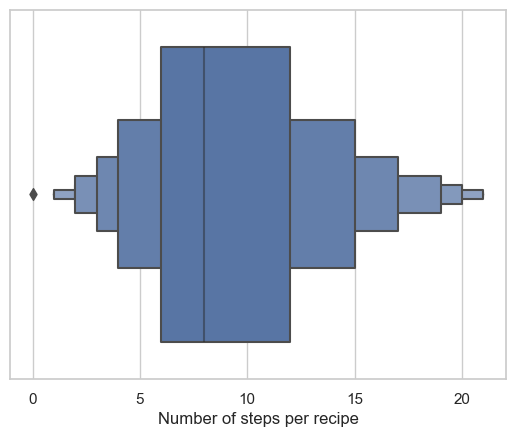

In [116]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_steps'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

Looking at the boxen plot, there seems to be an outlier on the lower end of the spectrum. To ensure the validity of our analysis, we will retain only the recipes that have at least one step. Since each recipe should have a minimum of one step, it is important to exclude any recipes that do not meet this requirement. By keeping only the recipes with more than zero steps, we ensure that our dataset consists of complete and meaningful recipe entries.

In [122]:
# Check dataframe
raw_recipes_df.head().sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11


We will proceed to keep only the recipes with at least 1 step.

In [117]:
# Filter for recipes with at least 1 step
raw_recipes_df = raw_recipes_df[raw_recipes_df['n_steps'] > 0]

In [121]:
# Sanity check
raw_recipes_df.head().sort_values('n_steps')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11


Let us now look at the number of ingredients.

In [124]:
# Number of ingredients
# Calculate the first quartile, third quartile and the interquartile range
Q1 = raw_recipes_df['n_ingredients'].quantile(0.25)
Q3 = raw_recipes_df['n_ingredients'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the maximum value and minimum values according to the Tukey rule
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Filter the data for values that are greater than max_value or less than min_value
nsteps_outliers = raw_recipes_df[(raw_recipes_df['n_ingredients'] > max_value) | (raw_recipes_df['n_ingredients'] < min_value)]
nsteps_outliers.sort_values('n_ingredients')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
95755,granola extreme,43916,45,27443,2002-10-22,"['60-minutes-or-less', 'time-to-make', 'course...","[105.0, 10.0, 10.0, 2.0, 5.0, 5.0, 3.0]",9,"[""preheat oven 300' degrees"", 'spray 2 baking ...","wholesome snack, great topping for vanilla yogurt","['oatmeal', 'wheat flakes', 'buckwheat flakes'...",19
137311,mocha mini bread loaves,349861,40,1109972,2009-01-14,"['60-minutes-or-less', 'time-to-make', 'course...","[268.4, 12.0, 75.0, 12.0, 14.0, 11.0, 14.0]",7,"['preheat oven to 350 degrees', 'combine dry i...",this is adapted from camilla saulsbury's muffi...,"['whole wheat flour', 'quick-cooking oats', 't...",19
68576,curried meatballs,315007,35,331557,2008-07-22,"['curries', '60-minutes-or-less', 'time-to-mak...","[414.4, 36.0, 21.0, 32.0, 59.0, 34.0, 6.0]",8,['heat oil over medium heat and stir-fry the o...,i was given this recipe by a co-worker of mine...,"['olive oil', 'onions', 'cinnamon stick', 'wat...",19
214382,tofu spinach calzones vegan or vegetarian,97154,35,37584,2004-08-06,"['60-minutes-or-less', 'time-to-make', 'course...","[346.1, 6.0, 8.0, 14.0, 21.0, 3.0, 21.0]",17,['mix water with yeast and sugar in a large mi...,these are great and vegan or vegetarian (see s...,"['warm water', 'yeast', 'sugar', 'salt', 'flou...",19
68671,curried rice and fruit salad,63805,65,37779,2003-06-05,"['weeknight', 'time-to-make', 'course', 'main-...","[379.1, 11.0, 86.0, 16.0, 12.0, 14.0, 24.0]",18,"['wash rice until water runs clear', 'drain we...",this rice salad has exotic flavors that make a...,"['basmati rice', 'peanut oil', 'green onion', ...",19
...,...,...,...,...,...,...,...,...,...,...,...,...
105723,hillbilly bean soup,11737,255,10404,2001-09-18,"['weeknight', 'time-to-make', 'course', 'main-...","[323.0, 2.0, 254.0, 1.0, 8.0, 1.0, 27.0]",6,"['boil the drained , soaked beans with the wat...",great soup for a fall or winters dinner. serve...,"['7 bean mix', 'water', 'ham bone', 'bay leaf'...",35
203614,sunday supper taco salad bowls tacos,502219,240,695000,2013-06-23,"['time-to-make', 'course', 'cuisine', 'prepara...","[10687.7, 1784.0, 49.0, 67.0, 59.0, 802.0, 26.0]",6,['heat vegetable oil to 350f submerge tortilla...,being served again at the free sunday supper o...,"['flour tortillas', 'ground beef', 'vegetable ...",37
18352,basic fried rice with variations,248707,55,305531,2007-08-25,"['60-minutes-or-less', 'time-to-make', 'course...","[793.3, 22.0, 8.0, 23.0, 37.0, 13.0, 48.0]",16,"['dice or shred meat and vegetables', 'heat oi...",another recipe that i acquired from a chinese ...,"['brown rice', 'green onions', 'oil', 'soy sau...",38
116744,kato s garage style tomato sauce meatba...,113677,270,128473,2005-03-18,"['time-to-make', 'course', 'main-ingredient', ...","[412.8, 36.0, 61.0, 47.0, 46.0, 38.0, 8.0]",9,"['spicy tomatoe & vegetable sauce', 'in a larg...",this is our favourite spagetti dinner...we mak...,"['sweet onion', 'garlic cloves', 'green pepper...",39


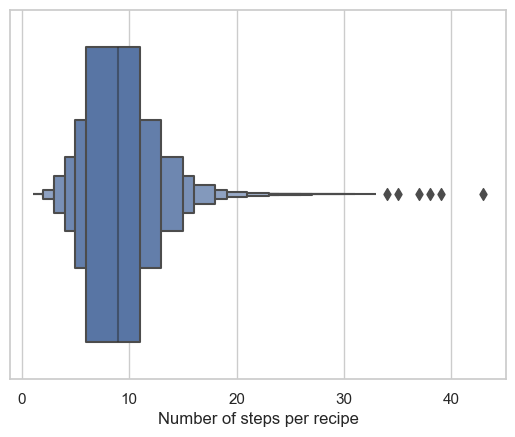

In [125]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = raw_recipes_df['n_ingredients'])
ax.set_xlabel('Number of steps per recipe')
plt.show()

A to Z Bread holds the distinction for having the highest number of ingredients among all recipes in the dataset. However, it is worth noting that a significant portion of these ingredients are labeled as optional. Although it deviates significantly from the average number of ingredients in the recipes, it is important to retain this data point to maintain the integrity and representativeness of the dataset. The presence of recipes with a higher number of optional ingredients adds variety and reflects the diverse nature of cooking and recipe preferences. By retaining this outlier, we ensure that our analysis encompasses a wide range of recipes and provides a comprehensive understanding of the dataset.

Let us now explore the user interactions dataset to gain insights into the ratings.

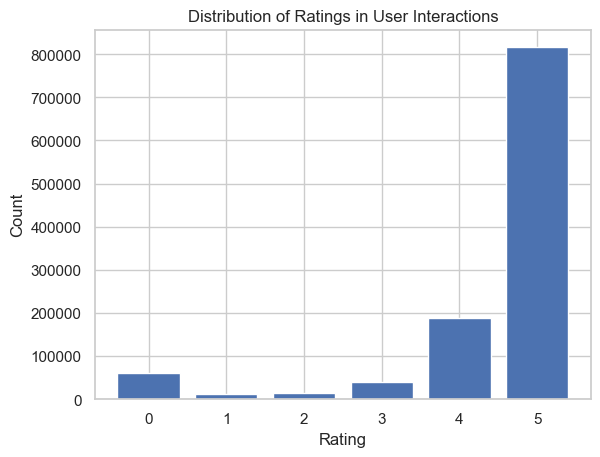

In [134]:
# Distribution of ratings

rating_counts = raw_users_df['rating'].value_counts().sort_index()
ratings = rating_counts.index
counts = rating_counts.values

plt.bar(ratings, counts)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in User Interactions')

plt.show()

We see that there are zero ratings. In the upcoming section, we will delve deeper into this aspect to gain a better understanding of the reasons behind these zero ratings and its implications.

### 3.5 Zero Ratings <a class="anchor" id="threefive"></a>

After further investigation, we have discovered from the source that zero ratings in the user interactions dataset represent reviews by users who have not yet tried the respective recipes. As our focus is on reviews from users who have actually tested the recipes, we will proceed to remove these zero-rated reviews from our dataset.

In [135]:
# Keep rows that have ratings between 1 and 5
raw_users_df = raw_users_df[raw_users_df['rating'] != 0]
raw_users_df.sort_values('rating')

,user_id,recipe_id,date,rating,review
704658,1762248,428870,2013-09-10,1,These were so awful that my husband threw them...
305820,856238,213319,2008-06-07,1,"There are no stars for less than ""one"". Not g..."
305823,1263812,213319,2009-07-02,1,"Yuck! While it's palatable, it's not fudge-li..."
305824,538920,213319,2009-08-07,1,Some things just should simply not be made low...
822728,4395,4829,2001-01-10,1,I believe there is a mistake in the amount of ...
...,...,...,...,...,...
428408,431813,171157,2007-06-27,5,Wow! This far exceeded my expectations. The ...
428409,546894,171157,2007-07-27,5,I have made this several times for guests and ...
428410,819967,171157,2009-05-19,5,"Amazing recipe, this will be my standard recip..."
428365,110433,22149,2007-05-13,5,This was so juicy and had just a little kick t...


## 4 Data Preprocessing <a class="anchor" id="four"></a>

After completing the data cleaning phase, we will proceed to the data preprocessing stage. Let's revisit the recipes dataframe to review its current state.

In [23]:
# View recipes dataset
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


The 'ingredient' and 'tags' columns contain lists, which provide valuable information for our analysis. To make this data more manageable, we will create dummy variables using one-hot encoding in the next section. Additionally, we can enhance the dataset by splitting the values in the 'nutrition' column and creating new columns for each nutritional metric. This transformation will allow us to explore the nutritional aspects of the recipes in more detail. In the upcoming section, we will proceed with this data transformation step.

In [24]:
# View user interactions dataset
raw_users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


The user interactions dataset appears to be in good shape.

### 4.1 Column Splitting <a class="anchor" id="fourone"></a>

The 'nutrition' column in the dataframe consists of a list of values representing various nutritional metrics, including calories, total fat, sugar, sodium, protein, and saturated fat. To facilitate further analysis, we have split these values and created new columns to capture each nutritional metric individually. Subsequently, we drop the original 'nutrition' column from the dataframe, as we have already extracted the nutritional metrics into separate columns.

In [25]:
# Split the values in the 'nutrition' column into separate columns
nutrition_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat']

for column in nutrition_columns:
    raw_recipes_df[column] = raw_recipes_df['nutrition'].apply(lambda x: eval(x)[nutrition_columns.index(column)])

# Drop the original 'nutrition' column
raw_recipes_df.drop('nutrition', axis=1, inplace=True)

In [26]:
# Sanity check
raw_recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0


In [27]:
# Check datatypes of new columns
raw_recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226657 entries, 0 to 231636
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   name            226657 non-null  object        
 1   id              226657 non-null  object        
 2   minutes         226657 non-null  int64         
 3   contributor_id  226657 non-null  object        
 4   submitted       226657 non-null  datetime64[ns]
 5   tags            226657 non-null  object        
 6   n_steps         226657 non-null  int64         
 7   steps           226657 non-null  object        
 8   description     226657 non-null  object        
 9   ingredients     226657 non-null  object        
 10  n_ingredients   226657 non-null  int64         
 11  calories        226657 non-null  float64       
 12  total_fat       226657 non-null  float64       
 13  sugar           226657 non-null  float64       
 14  sodium          226657 non-null  flo

Wonderful! As a result of the data transformation, we have successfully created separate columns to represent each specific nutritional value. These columns now store the respective nutritional metrics as floating-point values, which facilitates further analysis and computations involving these nutritional attributes.

In [28]:
raw_recipes_df['tags'].values

array(["['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment']",
       "['time-to-make', 'course', 'preparation', 'main-dish', 'chili', 'crock-pot-slow-cooker', 'dietary', 'equipment', '4-hours-or-less']",
       ...,
       "['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'appetizers', 'eggs-dairy', 'easy', 'finger-food', 'eggs', 'presentation', 'served-cold', '3-steps-or-less']",
       "['30-minutes-or-less', 'time-to-make', 'course', 'preparation', 'for-large-g

In [53]:
yee = [row for row in raw_recipes_df['tags'].values if 'lactose' in row]
yee

["['lactose', 'weeknight', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'bisques-cream-soups', 'soups-stews', 'potatoes', 'vegetables', 'american', 'spring', 'vegan', 'vegetarian', 'food-processor-blender', 'stove-top', 'dietary', 'seasonal', 'free-of-something', 'cauliflower', 'equipment', 'small-appliance', '4-hours-or-less']",
 "['lactose', '15-minutes-or-less', 'time-to-make', 'course', 'cuisine', 'preparation', 'occasion', 'north-american', 'for-large-groups', 'appetizers', 'mexican', 'easy', 'no-cook', 'potluck', 'holiday-event', 'vegan', 'vegetarian', 'dips', 'spreads', 'dietary', 'low-sodium', 'low-cholesterol', 'low-saturated-fat', 'low-calorie', 'low-carb', 'inexpensive', 'healthy-2', 'free-of-something', 'low-in-something', 'superbowl', 'to-go', 'equipment', 'small-appliance', 'mixer', 'number-of-servings', 'presentation', 'served-cold', 'technique']",
 "['lactose', '60-minutes-or-less', 'time-to-make', 'course', 'main-

### 4.2 One-Hot Encoding <a class="anchor" id="fourtwo"></a>

We will now proceed with the creation of dummy variables for the 'ingredient' and 'tags' columns. This step involves applying one-hot encoding to these columns, allowing us to represent the categorical information in a more structured format for further analysis.

Let us start with the 'ingredients' column.

In [55]:
test = raw_recipes_df[raw_recipes_df['ingredients'].str.contains('eggs')].head(3)
test

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,2669.3,160.0,976.0,107.0,62.0,310.0
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,734.1,66.0,199.0,10.0,10.0,117.0


In [56]:
import pandas as pd
from scipy.sparse import csr_matrix

# Convert the 'ingredients' column to list datatype
test['ingredients'] = test['ingredients'].apply(eval)

# Create dummy variables for each value in the list
dummy_variables = pd.get_dummies(test['ingredients'].apply(pd.Series).stack(), sparse=True).sum(level=0)

# Create a new DataFrame with the dummy variables, aligned with the original DataFrame's index
dummy_df = pd.DataFrame(dummy_variables, index=test.index)

# Concatenate the dummy DataFrame with the original DataFrame
test = pd.concat([test, dummy_df], axis=1)

# Print the updated DataFrame
test



C:\Users\kelly\AppData\Local\Temp\ipykernel_10884\1800916885.py:8: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_variables = pd.get_dummies(test['ingredients'].apply(pd.Series).stack(), sparse=True).sum(level=0)


,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,prepared pizza crust,salt,salt and pepper,sausage patty,strawberry,sugar,unsalted butter,vanilla wafers,walnuts,whipping cream
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",...,1,0,1,1,0,0,0,0,0,0
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"[sugar, unsalted butter, bananas, eggs, fresh ...",...,0,1,0,0,0,1,1,0,0,0
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"[vanilla wafers, butter, powdered sugar, eggs,...",...,0,0,0,0,1,0,0,1,1,1


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 11
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype           
---  ------                --------------  -----           
 0   name                  3 non-null      object          
 1   id                    3 non-null      object          
 2   minutes               3 non-null      int64           
 3   contributor_id        3 non-null      object          
 4   submitted             3 non-null      datetime64[ns]  
 5   tags                  3 non-null      object          
 6   n_steps               3 non-null      int64           
 7   steps                 3 non-null      object          
 8   description           3 non-null      object          
 9   ingredients           3 non-null      object          
 10  n_ingredients         3 non-null      int64           
 11  calories              3 non-null      float64         
 12  total_fat             3 non-null      float64        

In [58]:
from scipy.sparse import csr_matrix

# Convert the 'ingredients' column to list datatype
raw_recipes_df['ingredients'] = raw_recipes_df['ingredients'].apply(eval)

# Create dummy variables for each value in the list
dummy_variables = pd.get_dummies(raw_recipes_df['ingredients'].apply(pd.Series).stack(), sparse=True).sum(level=0)

# Create a new DataFrame with the dummy variables, aligned with the original DataFrame's index
dummy_df = pd.DataFrame(dummy_variables, index=raw_recipes_df.index)

# Concatenate the dummy DataFrame with the original DataFrame
raw_recipes_df = pd.concat([raw_recipes_df, dummy_df], axis=1)

# Print the updated DataFrame
raw_recipes_df

C:\Users\kelly\AppData\Local\Temp\ipykernel_10884\4241400533.py:7: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_variables = pd.get_dummies(raw_recipes_df['ingredients'].apply(pd.Series).stack(), sparse=True).sum(level=0)


In [28]:
# Convert the 'tags' column to list datatype
#raw_recipes_df['ingredients'] = raw_recipes_df['ingredients'].apply(eval)

# Create dummy variables for each value in the list
#dummy_variables = pd.get_dummies(raw_recipes_df['ingredients'].apply(pd.Series).stack()).sum(level=0)

# Filter the dummy variable columns based on the condition
#filtered_dummy_variables = dummy_variables.loc[:, dummy_variables.sum() > 30]

# Concatenate the filtered dummy variables with the original DataFrame
#raw_recipes_df = pd.concat([raw_recipes_df, filtered_dummy_variables], axis=1)

# Print the updated DataFrame
#raw_recipes_df.head()

Great! Now, let us do the same for the 'tags' column.

In [29]:
# Convert the 'ingredients' column to list datatype
raw_recipes_df['tags'] = raw_recipes_df['tags'].apply(eval)

# Create dummy variables for each value in the list
dummy_variables = pd.get_dummies(raw_recipes_df['tags'].apply(pd.Series).stack()).sum(level=0)

# Concatenate the dummy variables with the original DataFrame
raw_recipes_df = pd.concat([raw_recipes_df, dummy_variables], axis=1)

# Print the updated DataFrame
raw_recipes_df.head()


C:\Users\kelly\AppData\Local\Temp\ipykernel_14152\1306807211.py:5: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_variables = pd.get_dummies(raw_recipes_df['tags'].apply(pd.Series).stack()).sum(level=0)


MemoryError: Unable to allocate 955. MiB for an array with shape (226657, 552) and data type uint64

#### Saving the data

After diligently cleaning the datasets, it is important to save them to files for future use. By preserving these clean datasets, we can readily leverage them during the exploratory data analysis (EDA) phase. Saving the cleaned datasets ensures that the processed data is readily available, allowing us to delve into a comprehensive analysis of the dataset's characteristics and relationships.

In [ ]:
# Save the clean datasets
raw_recipes_df.to_pickle("clean_recipes.pkl")
raw_users_df.to_pickle("clean_interactions.pkl")

## 5 Conclusion <a class="anchor" id="five"></a>

During the data preprocessing step of the recipe recommendation system, the following changes and actions were performed:

- Converted the 'id' columns from integer to string data type for consistency and manipulation ease.
- Dropped rows with missing values in the 'name' column and rows with missing values in the 'description' column.
- Verified that there were no duplicate rows in the dataset.
- Split the values in the 'nutrition' column, creating new columns for each individual nutritional value (calories, total fat, sugar, sodium, protein, saturated fat).

With the datasets now clean and appropriately processed, we are well-prepared for the next phase of our project, which involves EDA and modeling. 